# Computational Methods - Homework 10
## Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808 

### Using scipy.integrate.solve_bvp solve the problem presented in the shooting method section:

<img src="imgs/shooting_method.png" width="800" />

### Analytical solution using SymPy:

In [1]:
import sympy as sym

In [2]:
x = sym.symbols('x')
T = sym.Function('T')

LHS = (T(x).diff(x)).diff(x)
RHS = 0.01 * T(x) - 0.2

Equation = sym.Eq(LHS, RHS)  #The differential equation.
Equation

Eq(Derivative(T(x), (x, 2)), 0.01*T(x) - 0.2)

In [3]:
Sol_An = sym.dsolve(Equation, ics = {T(0): 40, T(10): 200})  #The analytical solution of the differential equation.
Sol_An

Eq(T(x), -53.4522786865455*(((exp(-0.1*x)**(-1.0))**(-1.0))**(-1.0))**(-1.0) + 73.4522786865455*((exp(-0.1*x)**(-1.0))**(-1.0))**(-1.0) + 20.0)

In [4]:
T_An = sym.lambdify(x, Sol_An.args[1])  #The analytical solution as a Python function.

### Numerical solution using scipy.integrate.solve_bvp

$$\frac{d^2T}{dx^2}=0.01T-0.2; \enspace T(0)=40, \enspace T(10)=200$$

$$\frac{dT}{dx}=z; \enspace \frac{dz}{dx} = 0.01T-0.2; \enspace y(x)= \left( T(x), z(x) \right)$$

$$f \left(x,y\right)=\frac{dy}{dx}=\left( \frac{dT}{dx}, \frac{dz}{dx} \right)=\left( z, 0.01T-0.2 \right)$$

In [5]:
from scipy.integrate import solve_bvp
import numpy as np

def f(x, y):
    
    f = np.zeros((y.shape))
    f[0] = y[1]
    f[1] = 0.01 * y[0] - 0.2
    
    return f

def bc(ya, yb):  #Boundary conditions.
    
    residuals = np.zeros(2)
    residuals[0] = ya[0] - 40
    residuals[1] = yb[0] - 200
    
    return residuals

x_steps = 100
X = np.linspace(0, 10, x_steps)

y0 = np.zeros((2, x_steps))
Solution = solve_bvp(f, bc, X, y0)

### Plotting both solutions

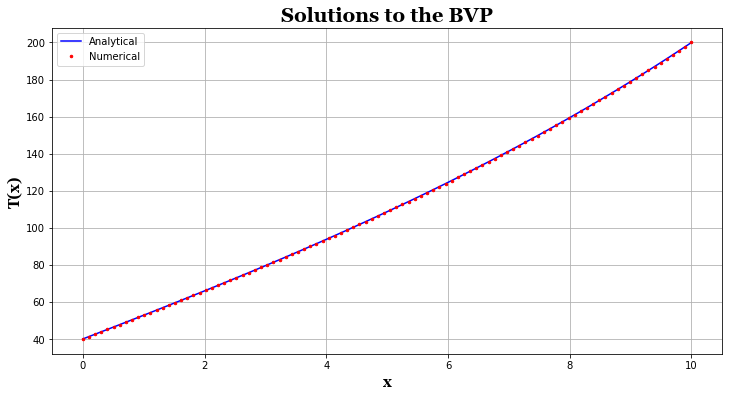

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (12,6))
font1 = {'family':'Georgia', 'weight':'bold', 'size': 20}
font2 = {'family':'Georgia', 'weight':'bold', 'size': 15}

ax.plot(Solution.x, T_An(Solution.x), '-b', label = 'Analytical')
ax.plot(Solution.x, Solution.y[0],'.r', markersize = 5, label = 'Numerical')

ax.set_title('Solutions to the BVP', **font1)
ax.set_xlabel('x', **font2)
ax.set_ylabel('T(x)', **font2)
ax.legend()
ax.grid()